In [1]:
library(statnet)
library(stats)

Loading required package: tergm

Loading required package: ergm

Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.11.0, created on 2020-10-14
Copyright (c) 2020, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, UNSW Sydney
                    M

               Installed ReposVer Built  
EpiModel       "2.0.3"   "2.1.0"  "4.0.5"
ergm           "3.11.0"  "4.1.2"  "4.0.5"
ergm.count     "3.4.0"   "4.0.2"  "4.0.5"
ergm.ego       "0.6.1"   "1.0.0"  "4.0.5"
ergm.rank      "1.2.0"   "4.0.0"  "4.0.5"
ndtv           "0.13.0"  "0.13.1" "4.0.5"
network        "1.16.1"  "1.17.1" "4.0.5"
networkDynamic "0.10.1"  "0.11.0" "4.0.5"
relevent       "1.0-4"   "1.1"    "4.0.5"
statnet.common "4.4.1"   "4.5.0"  "4.0.5"
tergm          "3.7.0"   "4.0.2"  "4.0.5"
tsna           "0.3.3"   "0.3.4"  "4.0.5"


Restart R and use "statnet::update_statnet()" to get the updates.



In [2]:
el_dist = read.csv("../data/common/dist.csv", stringsAsFactors = FALSE)
el_dist$log_dist = log(el_dist$dist)
dist_net = network(el_dist, directed = TRUE, matrix.type = "edgelist")
set.edge.value(dist_net, "dist", el_dist$dist)
set.edge.value(dist_net, "log_dist", el_dist$log_dist)
dist_net

 Network attributes:
  vertices = 166 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 27556 
    missing edges= 0 
    non-missing edges= 27556 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [3]:
el_diplomatic = read.csv("../data/2011/features/dip_exhange_clean.csv", stringsAsFactors = FALSE)
diplomatic_exchange_net = network(el_diplomatic, directed = TRUE, matrix.type = "edgelist")
diplomatic_exchange_net

 Network attributes:
  vertices = 166 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 7472 
    missing edges= 0 
    non-missing edges= 7472 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [4]:
el_colony = read.csv("../data/common/colonization_el.csv", stringsAsFactors = FALSE)
colony_net = network(el_colony, directed = TRUE, matrix.type = "edgelist")
set.edge.value(colony_net, "colonization", el_colony$colonization)
colony_net

 Network attributes:
  vertices = 166 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 27556 
    missing edges= 0 
    non-missing edges= 27556 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [5]:
el = read.csv("../data/2011/edgelist_disparity.csv", stringsAsFactors = FALSE)
nl = read.csv("../data/2011/nodelist.csv", stringsAsFactors = FALSE)

In [6]:
nl$gdp_us_dollar <- log(nl$gdp_us_dollar)
nl$area <- log(nl$area)
nl$population <- log(nl$population)
nl$gdp_per_capita <- log(nl$gdp_per_capita)

In [7]:
nl$gdp_us_dollar = as.numeric(scale(nl$gdp_us_dollar))
nl$gdp_growth = as.numeric(scale(nl$gdp_growth))
nl$inflation_rate = as.numeric(scale(nl$inflation_rate))
nl$population = as.numeric(scale(nl$population))
nl$gdp_per_capita = as.numeric(scale(nl$gdp_per_capita))
nl$agriculture_forestry_fishing_of_gdp = as.numeric(scale(nl$agriculture_forestry_fishing_of_gdp))
nl$industry_of_gdp = as.numeric(scale(nl$industry_of_gdp))
nl$merchandise_of_gdp = as.numeric(scale(nl$merchandise_of_gdp))
nl$net_barter_of_trade = as.numeric(scale(nl$net_barter_of_trade))
nl$foreign_direct_investment_inflows = as.numeric(scale(nl$foreign_direct_investment_inflows))

In [8]:
net = network(el, directed = TRUE, matrix.type = 'edgelist', vertex.attr=nl, vertex.attrnames=colnames(nl), ignore.eval = FALSE, names.eval='trade')
set.edge.value(net, "trade", el$weight)
net

 Network attributes:
  vertices = 166 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 3417 
    missing edges= 0 
    non-missing edges= 3417 

 Vertex attribute names: 
    agriculture_forestry_fishing_of_gdp area continent country_iso3 foreign_direct_investment_inflows gdp_growth gdp_per_capita gdp_us_dollar industry_of_gdp inflation_rate landlocked langoff_1 merchandise_of_gdp net_barter_of_trade population vertex.names 

 Edge attribute names not shown 

In [9]:
set.seed(19746)
model = ergm(
                        net ~
                        edges +
                        mutual +
                        triangles + 
                        nodecov("gdp_us_dollar") + # world bank
                        absdiff("gdp_us_dollar") + # world bank
                        nodecov("inflation_rate") + # world bank
                        absdiff("inflation_rate") + # world bank
                        nodecov("gdp_growth") + # world bank
                        absdiff("gdp_growth") + # world bank
                        nodematch("landlocked") + # http://www.cepii.fr/CEPII/en/bdd_modele/download.asp?id=6
                        nodematch("langoff_1") + # http://www.cepii.fr/CEPII/en/bdd_modele/download.asp?id=6
                        edgecov(diplomatic_exchange_net) + # https://pardee.du.edu/diplomatic-representation-data-set
                        nodecov("agriculture_forestry_fishing_of_gdp") + # world bank
                        absdiff("agriculture_forestry_fishing_of_gdp") + # world bank
                        nodecov("industry_of_gdp") + # world bank
                        absdiff("industry_of_gdp") + # world bank
                        nodecov("merchandise_of_gdp") + # world bank
                        absdiff("merchandise_of_gdp") + # world bank
                        nodecov("net_barter_of_trade") + # world bank
                        absdiff("net_barter_of_trade") + # world bank
                        nodecov("foreign_direct_investment_inflows") + # world bank
                        absdiff("foreign_direct_investment_inflows") + # world bank
                        edgecov(colony_net, "colonization") +
                        edgecov(dist_net, "log_dist"),
                )

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 0.24324708276973.

The log-likelihood improved by 1.907.

Iteration 2 of at most 20:

Optimizing with step length 0.372452693862374.

The log-likelihood improved by 2.535.

Iteration 3 of at most 20:

Optimizing with step length 0.587376663200149.

The log-likelihood improved by 1.972.

Iteration 4 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 1.682.

Step length converged once. Increasing MCMC sample size.

Iteration 5 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.7174.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 


In [10]:
summary(model)

Call:
ergm(formula = net ~ edges + mutual + triangles + nodecov("gdp_us_dollar") + 
    absdiff("gdp_us_dollar") + nodecov("inflation_rate") + absdiff("inflation_rate") + 
    nodecov("gdp_growth") + absdiff("gdp_growth") + nodematch("landlocked") + 
    nodematch("langoff_1") + edgecov(diplomatic_exchange_net) + 
    nodecov("agriculture_forestry_fishing_of_gdp") + absdiff("agriculture_forestry_fishing_of_gdp") + 
    nodecov("industry_of_gdp") + absdiff("industry_of_gdp") + 
    nodecov("merchandise_of_gdp") + absdiff("merchandise_of_gdp") + 
    nodecov("net_barter_of_trade") + absdiff("net_barter_of_trade") + 
    nodecov("foreign_direct_investment_inflows") + absdiff("foreign_direct_investment_inflows") + 
    edgecov(colony_net, "colonization") + edgecov(dist_net, "log_dist"))

Iterations:  5 out of 20 

Monte Carlo MLE Results:
                                             Estimate Std. Error MCMC % z value
edges                                       -4.545306   0.292507      0 -

In [11]:
set.seed(18717)
gof <- gof(model ~ model + distance + triadcensus)

In [12]:
gof


Goodness-of-fit for model statistics 

                                                    obs         min        mean
edges                                        3416.00000  3209.00000  3410.04000
mutual                                        324.00000   279.00000   322.44000
triangle                                    13862.00000 10922.00000 13742.49000
nodecov.gdp_us_dollar                        -821.10899 -1005.61036  -824.30231
absdiff.gdp_us_dollar                        4366.84990  4134.51257  4364.75424
nodecov.inflation_rate                       -143.36930  -347.63576  -150.32262
absdiff.inflation_rate                       2884.89469  2531.02848  2875.93680
nodecov.gdp_growth                            242.44471   -22.96250   220.93355
absdiff.gdp_growth                           2349.80140  2111.11603  2360.09129
nodematch.landlocked                         2032.00000  1884.00000  2027.19000
nodematch.langoff_1                           262.00000   216.00000   256.66000


In [13]:
pdf("../reports/gof.pdf", width = 15, height = 5)
layout(matrix(c(1,2,3), nrow = 1, ncol = 3, byrow = TRUE), widths = c(5,5,5), heights = c(5,5,5))
plot(gof)
dev.off() 

png 
  2

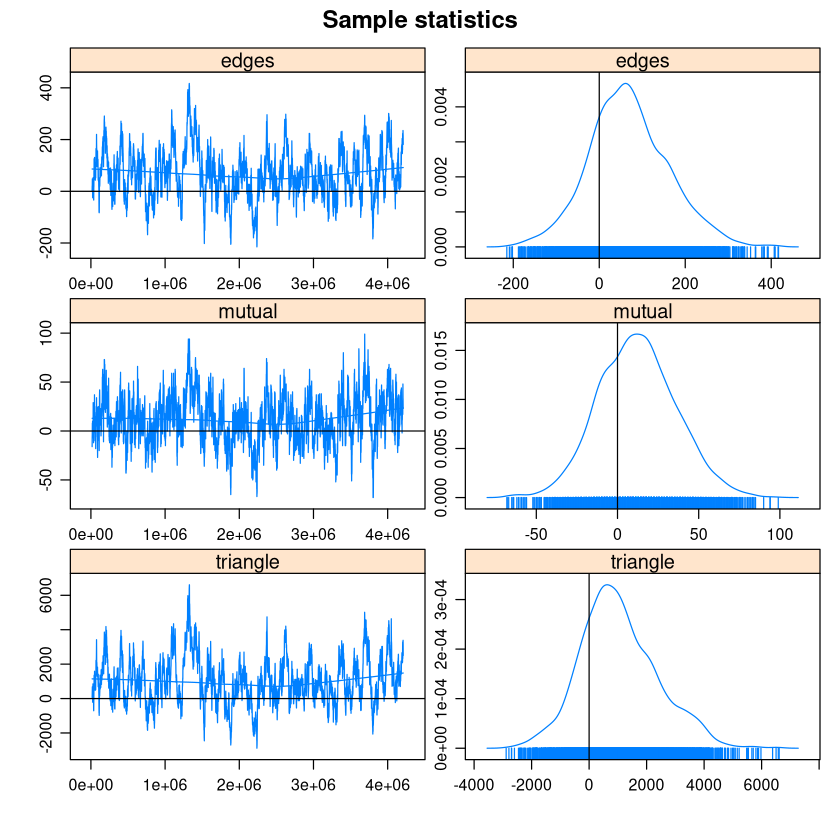

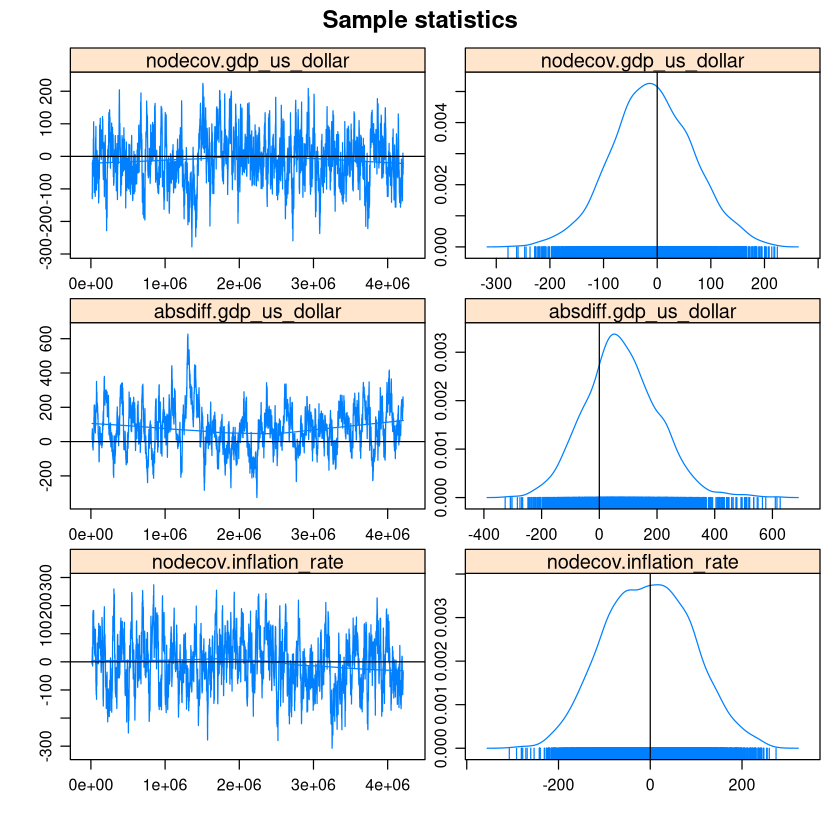

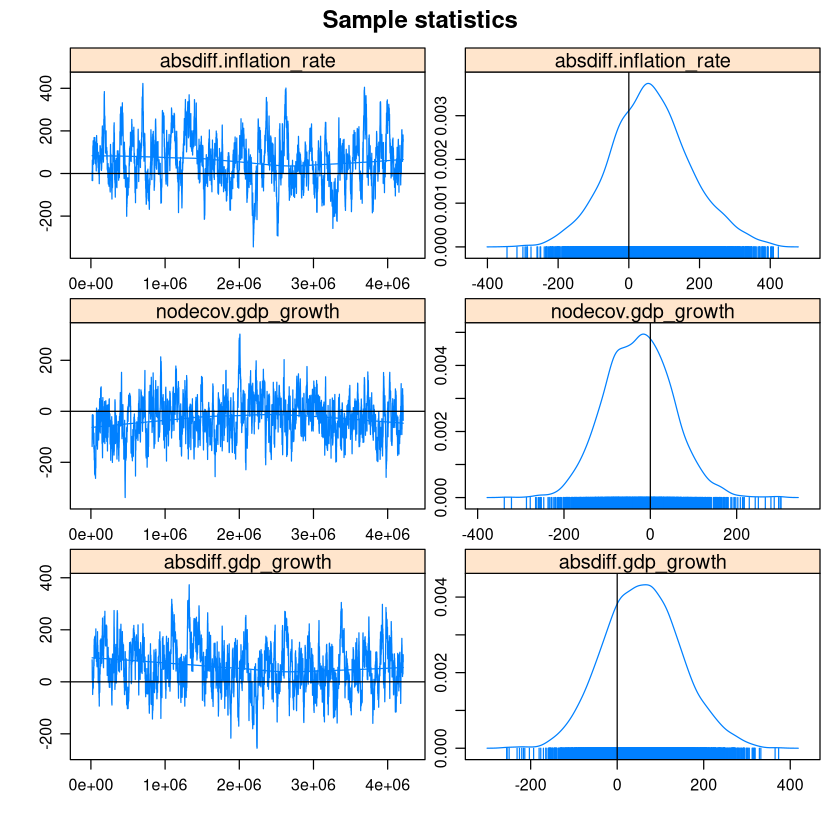

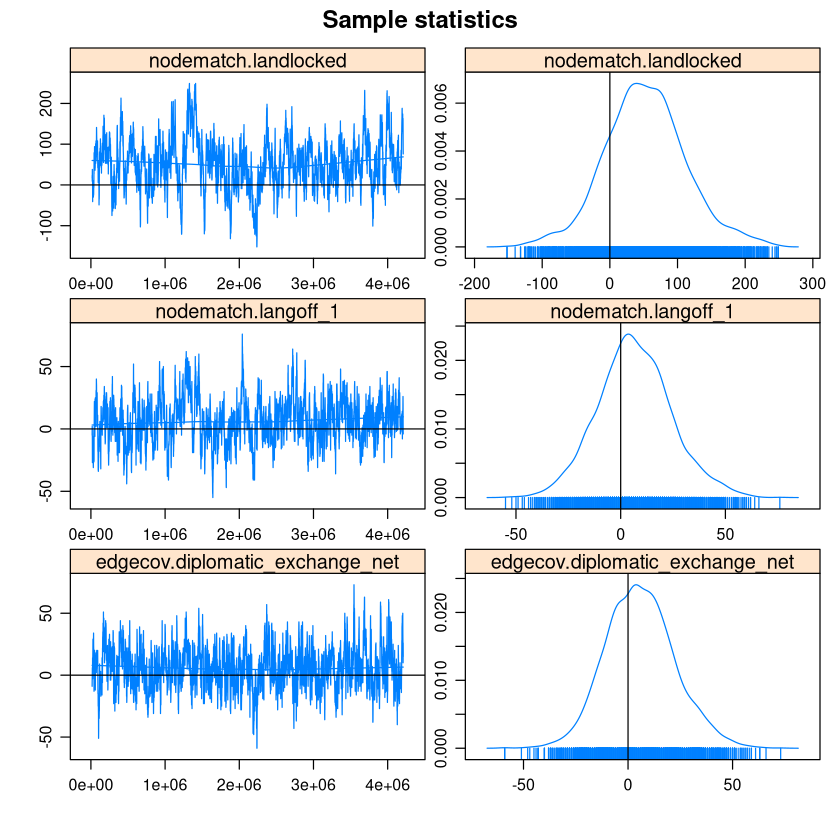

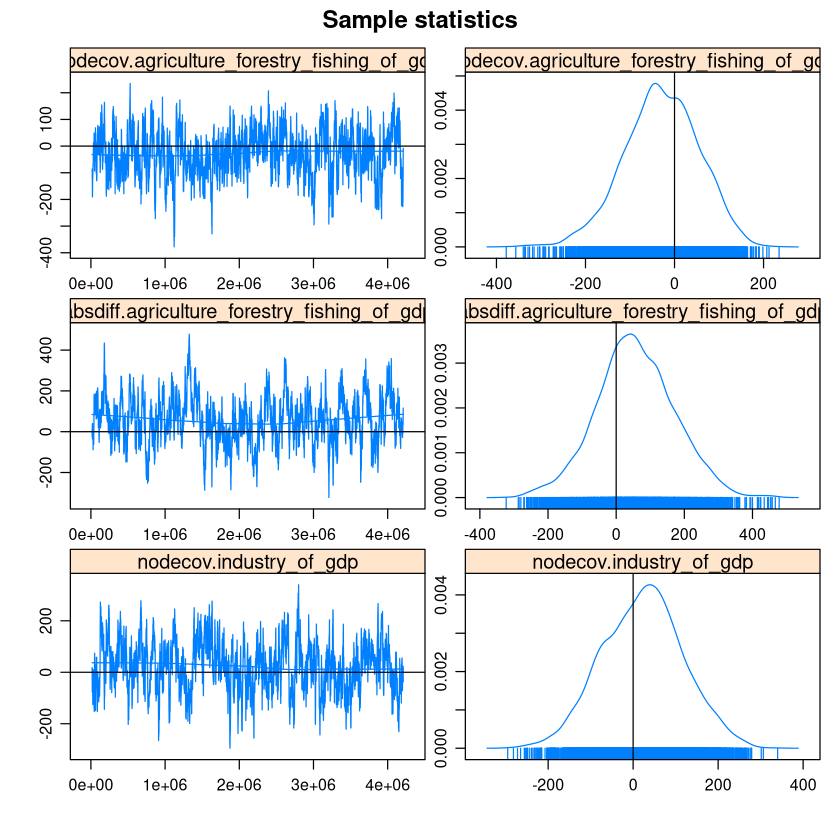

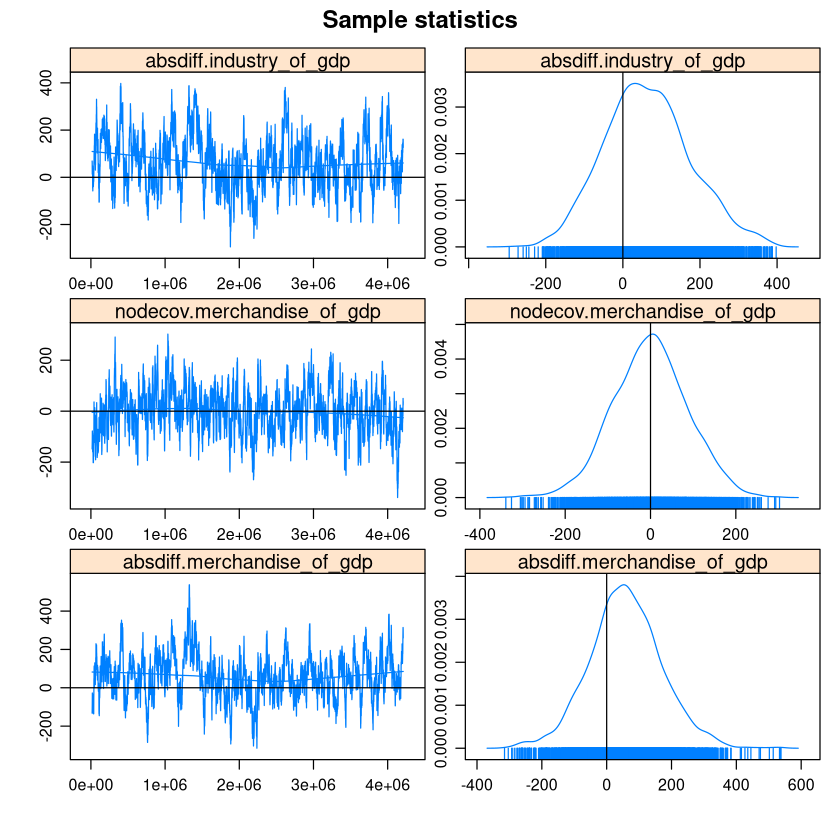

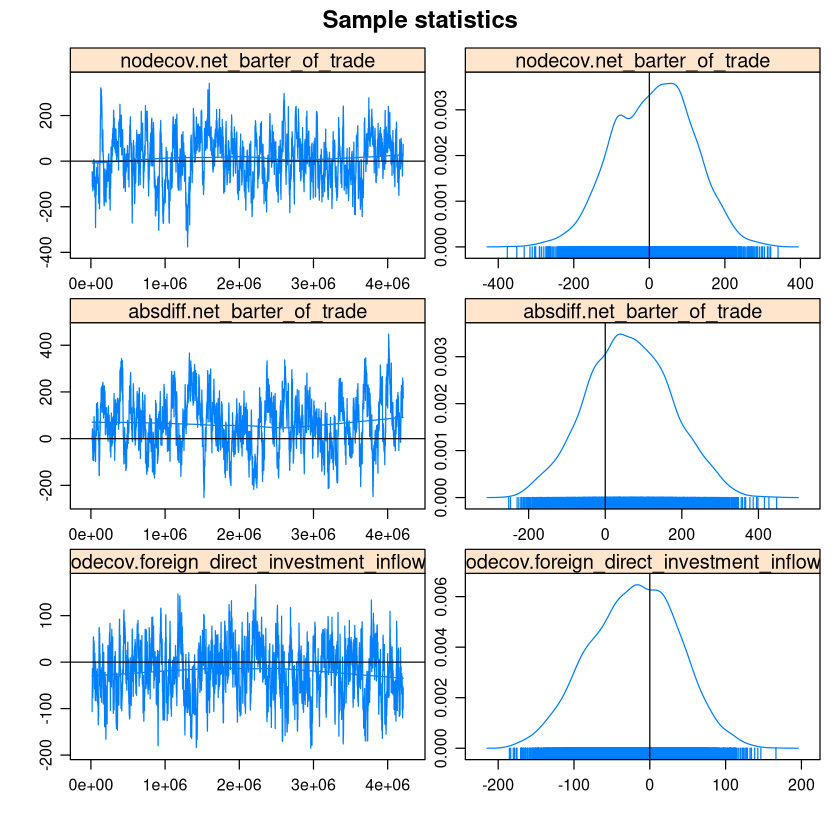


MCMC diagnostics shown here are from the last round of simulation, prior to computation of final parameter estimates. Because the final estimates are refinements of those used for this simulation run, these diagnostics may understate model performance. To directly assess the performance of the final model on in-model statistics, please use the GOF command: gof(ergmFitObject, GOF=~model).


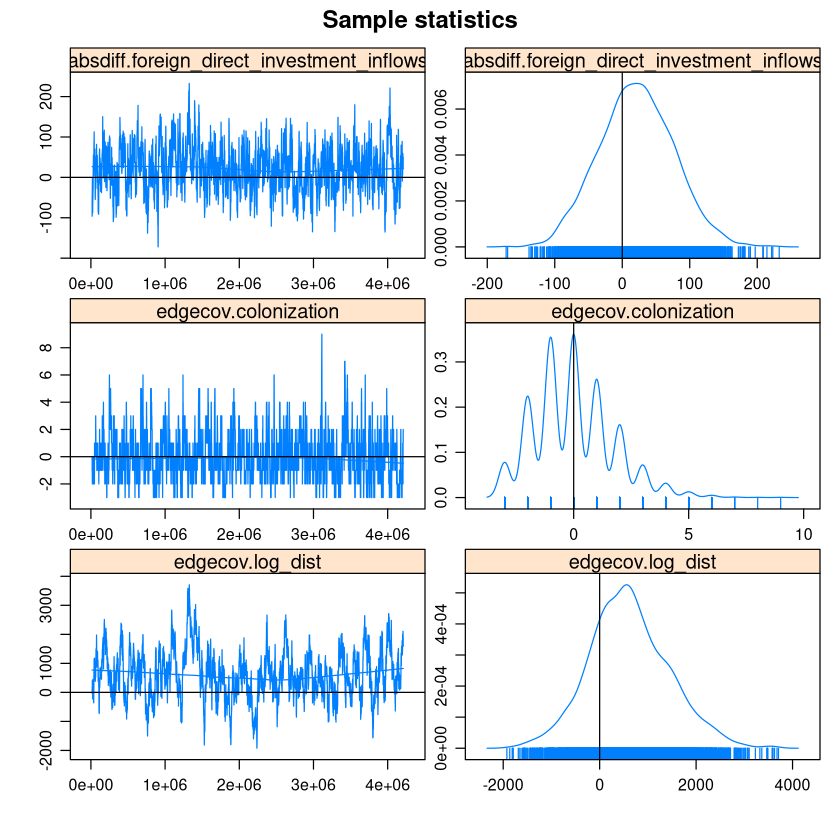

In [14]:
mcmc.diagnostics(model, which = c("plots"))

### Check correlations

In [15]:
filtered_nl = nl[, !startsWith(colnames(nl), 'scaled') & !startsWith(colnames(nl), 'log')]
nums <- unlist(lapply(filtered_nl, is.numeric))

In [16]:
cor(filtered_nl[, nums])

,net_barter_of_trade,inflation_rate,gdp_per_capita,population,merchandise_of_gdp,landlocked,foreign_direct_investment_inflows,industry_of_gdp,agriculture_forestry_fishing_of_gdp,gdp_growth,area,gdp_us_dollar
net_barter_of_trade,1.00000000,0.078314042,-0.08622343,0.11855892,-0.035626692,0.068012354,-0.123833193,0.55221983,0.02883888,0.032314664,0.30959536,0.048137942
inflation_rate,0.07831404,1.000000000,-0.35208645,0.17808291,-0.008408133,0.088971183,-0.105751278,0.03259583,0.22242600,0.002927180,0.19515335,-0.070874068
gdp_per_capita,-0.08622343,-0.352086451,1.00000000,-0.13956272,0.250333998,-0.281424310,0.291657685,0.22133883,-0.82694513,-0.111349590,-0.14201092,0.517037781
population,0.11855892,0.178082910,-0.13956272,1.00000000,-0.190508544,0.012313521,0.316565717,0.14291746,0.14282607,0.049171448,0.81832019,0.775354257
merchandise_of_gdp,-0.03562669,-0.008408133,0.25033400,-0.19050854,1.000000000,0.006623188,0.071711929,0.22011799,-0.29388965,0.049824497,-0.23229525,-0.003863552
landlocked,0.06801235,0.088971183,-0.28142431,0.01231352,0.006623188,1.000000000,-0.121480619,-0.03249102,0.27373788,0.135857620,0.10711739,-0.169535753
foreign_direct_investment_inflows,-0.12383319,-0.105751278,0.29165768,0.31656572,0.071711929,-0.121480619,1.000000000,-0.02619852,-0.19398341,0.001240165,0.20405569,0.459155825
industry_of_gdp,0.55221983,0.032595828,0.22133883,0.14291746,0.220117991,-0.032491018,-0.026198518,1.00000000,-0.34277848,-0.114657259,0.26192618,0.265927194
agriculture_forestry_fishing_of_gdp,0.02883888,0.222426000,-0.82694513,0.14282607,-0.293889645,0.273737883,-0.193983411,-0.34277848,1.00000000,0.150970431,0.15494457,-0.404118232
gdp_growth,0.03231466,0.002927180,-0.11134959,0.04917145,0.049824497,0.135857620,0.001240165,-0.11465726,0.15097043,1.000000000,0.01366847,-0.028226973


In [17]:
cor_results = cor(filtered_nl[, nums]) > .6
diag(cor_results) = F

In [18]:
col_names = colnames(cor_results)
temp = matrix('', nrow=length(col_names), ncol = length(col_names))
for (i in 1:length(col_names)) {
    for (j in 1:length(col_names)) {
        temp[i, j] = paste(col_names[i], col_names[j])
    }
}

In [19]:
temp[cor_results]

[1] "area population"          "gdp_us_dollar population"
[3] "population area"          "gdp_us_dollar area"      
[5] "population gdp_us_dollar" "area gdp_us_dollar"